## In This Notebook we will Create Figures to better understand out models performance

In [26]:
import math

#### Making our working directory

In [27]:
# Set a working directory
import os

directory_path = '/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/'
os.chdir(directory_path)


In [28]:
%run python/04_Populations-model-fitting/01_model-preparation.ipynb


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_52318/510791959.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [29]:
import pandas as pd

covari_path = 'data/modified/RF_ready_covari.csv'
#using pandas to read in as a df
covari = (pd.read_csv(covari_path,parse_dates=[0]))
#taking a peak at the data
covari.head(4)


time              population        lat         lon  \
0 2016-04-20 07:00:00         Prochlorococcus  21.520326 -158.326984   
1 2016-04-20 07:00:00           Synechococcus  21.520326 -158.326984   
2 2016-04-20 07:00:00  nanoeukaryotes (2-5µm)  21.520326 -158.326984   
3 2016-04-20 07:00:00  picoeukaryotes (< 2µm)  21.520326 -158.326984   

     biomass      salin       temp cruisename      SiO2       POC  ...  \
0  10.520443  34.893785  24.351745    KOK1606 -0.022845  0.032884  ...   
1   0.341429  34.893785  24.351745    KOK1606 -0.022845  0.032884  ...   
2   3.338212  34.893785  24.351745    KOK1606 -0.022845  0.032884  ...   
3   0.701902  34.893785  24.351745    KOK1606 -0.022845  0.032884  ...   

           O2       NO3       NO2       NH4       FeT       DOC          DIC  \
0  214.191393  2.252042  0.295276  1.282981  0.000015  1.648093  1697.874775   
1  214.191393  2.252042  0.295276  1.282981  0.000015  1.648093  1697.874775   
2  214.191393  2.252042  0.295276  1.282981  0.000015  1.648093  1697.874775   
3  214.191393  2.252042  0.295276  1.282981  0.000015  1.648093  1697.874775   

       CDOM         ALK     par  
0  0.000034  1954.87665  0.0193  
1  0.000034  1954.87665  0.0193  
2  0.000034  1954.87665  0.0193  
3  0.000034  1954.87665  0.0193  

[4 rows x 22 columns]

In [30]:
covari.iloc[:,8:].columns

Index(['SiO2', 'POC', 'PO4', 'PIC', 'O2', 'NO3', 'NO2', 'NH4', 'FeT', 'DOC',
       'DIC', 'CDOM', 'ALK', 'par'],
      dtype='object')

### First we will load each random forest model into our notebook

In [31]:
import joblib
# Prochlorooccus
rf_pro = joblib.load("RF_models/pro_random_forest.joblib")

# Synechococus
rf_syn = joblib.load("RF_models/syn_random_forest.joblib")

# Nanoeukaryotes
rf_nano = joblib.load("RF_models/nano_random_forest.joblib")

# Picoeukaryotes
rf_pico = joblib.load("RF_models/pico_random_forest.joblib")

In [32]:
# !pip install cartopy


In [33]:
# pip install folium


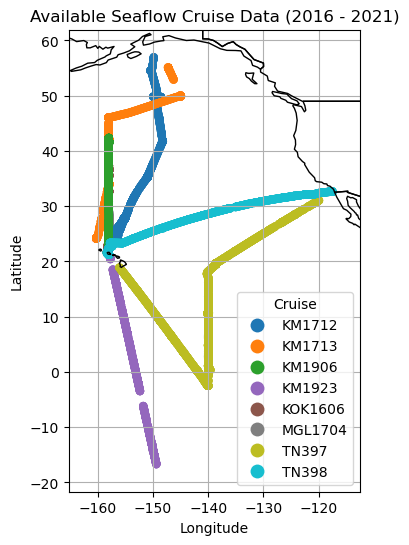

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import contextily as cx
from shapely.geometry import Point

def cruise_tract(dataframe):
    # Create starting cruise tracks df that contains Nans
    cruise_tracks = dataframe[['time', 'lat', 'lon', 'cruisename']]

    # Creating geometry points to plot
    geometry = [Point(xy) for xy in zip(cruise_tracks['lon'], cruise_tracks['lat'])]
    gdf = GeoDataFrame(cruise_tracks, geometry=geometry, crs=3857)

    # Load the world map shapefile using GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Create a GeoPandas plot of the world map
    fig, ax = plt.subplots(figsize=(10, 6))
    world.boundary.plot(ax=ax, linewidth=1, color='black')  # plot the world map boundaries

    # Setting bounds of the map
    bounds = gdf.geometry.bounds
    ax.set_xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
    ax.set_ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

    # Use the 'cruisename' column to color the cruise tracks
    gdf.plot(column='cruisename', linewidth=0.05, ax=ax, legend=True, cmap='tab10', legend_kwds={'title': 'Cruise'})

    # Set the background color of the plot to white
    ax.set_facecolor('white')
    ax.grid()

    # Set the title and labels for the plot
    ax.set_title('Available Seaflow Cruise Data (2016 - 2021)')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    plt.show()

# Assuming 'cruisename' is the correct column in your 'covari' dataframe that contains the cruise names
cruise_tract(covari)


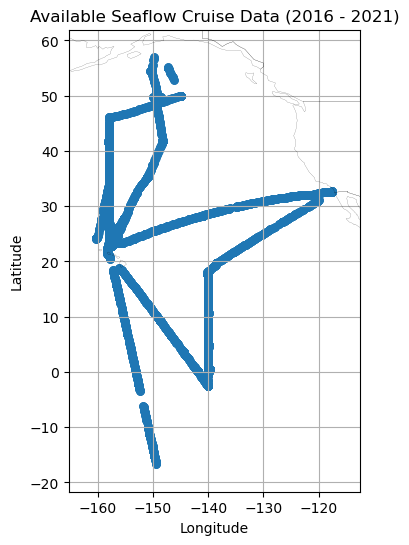

In [35]:
def cruise_tract(dataframe):
    import seaborn as sns
    import pandas as pd
    import geopandas as gpd
    from geopandas import GeoSeries, GeoDataFrame
    import contextily as cx


    # Create starting cruise tracks df that contains Nans
    cruise_tracks = dataframe[['time', 'lat', 'lon']]

    # Creating a geometry dataframe to map in geopandas
    from shapely.geometry import Point
    # Creating geometry points to plot
    geometry = [Point(xy) for xy in zip(cruise_tracks['lon'],
                                        cruise_tracks['lat'])]

    gdf = GeoDataFrame(cruise_tracks, geometry=geometry, crs=3857)

    # Load the world map shapefile using GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Create a GeoPandas plot of the world map
    fig, ax = plt.subplots(figsize=(10, 6))
    world.boundary.plot(ax=ax, linewidth=0.1, color='black')  # plot the world map boundaries
    #setting bounds of the map
    bounds = gdf.geometry.bounds

    ax.set_xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
    ax.set_ylim([bounds.miny.min()-5, bounds.maxy.max()+5])


    gdf.plot(linewidth=0.05, ax=ax)
    # Set the background color of the plot to white
    ax.set_facecolor('white')
    ax.grid()

    # Set the title and labels for the plot
    ax.set_title('Available Seaflow Cruise Data (2016 - 2021)')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    plt.show()

cruise_tract(covari)

## To make residuals we will predict on all available data for each picophytoplankton's population

In [36]:
def predictions_and_residuals(rf, features, pop_df):
    # Filter dataframes based on PopulationName
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(features)
    
    # Add 'Prediction' and 'residuals' columns to the dataframe
    pop_df.rename(columns={'biomass': 'actual'}, inplace=True)
    pop_df['prediction'] = predictions
    pop_df['residuals'] = ((pop_df['actual'] - pop_df['prediction']) / pop_df['actual']) * 100
    
    return pop_df  



pro_df = predictions_and_residuals(rf=rf_pro, features=features_pro, pop_df=pro_df)
syn_df = predictions_and_residuals(rf=rf_syn, features=features_syn, pop_df=syn_df)
nano_df = predictions_and_residuals(rf=rf_nano, features=features_nano, pop_df=nano_df)
pico_df = predictions_and_residuals(rf=rf_pico, features=features_pico, pop_df=pico_df)


In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_actual_prediction_plots(pop_df, title_prefix='Prochlorococcus'):
    unique_cruises = pop_df['cruisename'].unique()

    # Create a subplot grid
    num_cruises = len(unique_cruises)
    rows = int(num_cruises / 2) if num_cruises % 2 == 0 else int(num_cruises / 2) + 1
    fig = make_subplots(rows=rows, cols=2, subplot_titles=unique_cruises)

    # Define colors for 'actual' and 'prediction' traces
    actual_color = 'blue'
    prediction_color = 'red'

    # Iterate over each unique cruise and add a subplot
    for i, cruise in enumerate(unique_cruises):
        # Filter dataframe for the current cruise
        cruise_df = pop_df[pop_df['cruisename'] == cruise]

        # Add the scatter plots for 'actual' and 'prediction' to the subplot
        row = int(i / 2) + 1
        col = i % 2 + 1
        fig.add_trace(go.Scatter(x=cruise_df['time'], y=cruise_df['actual'], mode='markers', name='Actual',
                                 marker=dict(color=actual_color)),
                      row=row, col=col)
        fig.add_trace(go.Scatter(x=cruise_df['time'], y=cruise_df['prediction'], mode='lines', name='Prediction',
                                 line=dict(color=prediction_color)),
                      row=row, col=col)
        fig.update_xaxes(title_text='Time', row=row, col=col)
        fig.update_yaxes(title_text='Value', row=row, col=col)

    # Update the layout and display the figure
    fig.update_layout(height=600 * rows, width=800, title_text='Actual and Prediction for Each Cruise')
    fig.show()
    
    fig.write_html(f"figures/{title_prefix}/Actual_vs_Prediction-{title_prefix}.html")


In [38]:
create_actual_prediction_plots(pop_df=pro_df, title_prefix='Prochlorococcus')
create_actual_prediction_plots(pop_df=syn_df, title_prefix='Synechococcus')
create_actual_prediction_plots(pop_df=nano_df, title_prefix='Nanoeukaryotes')
create_actual_prediction_plots(pop_df=pico_df, title_prefix='Picoeukaryotes')

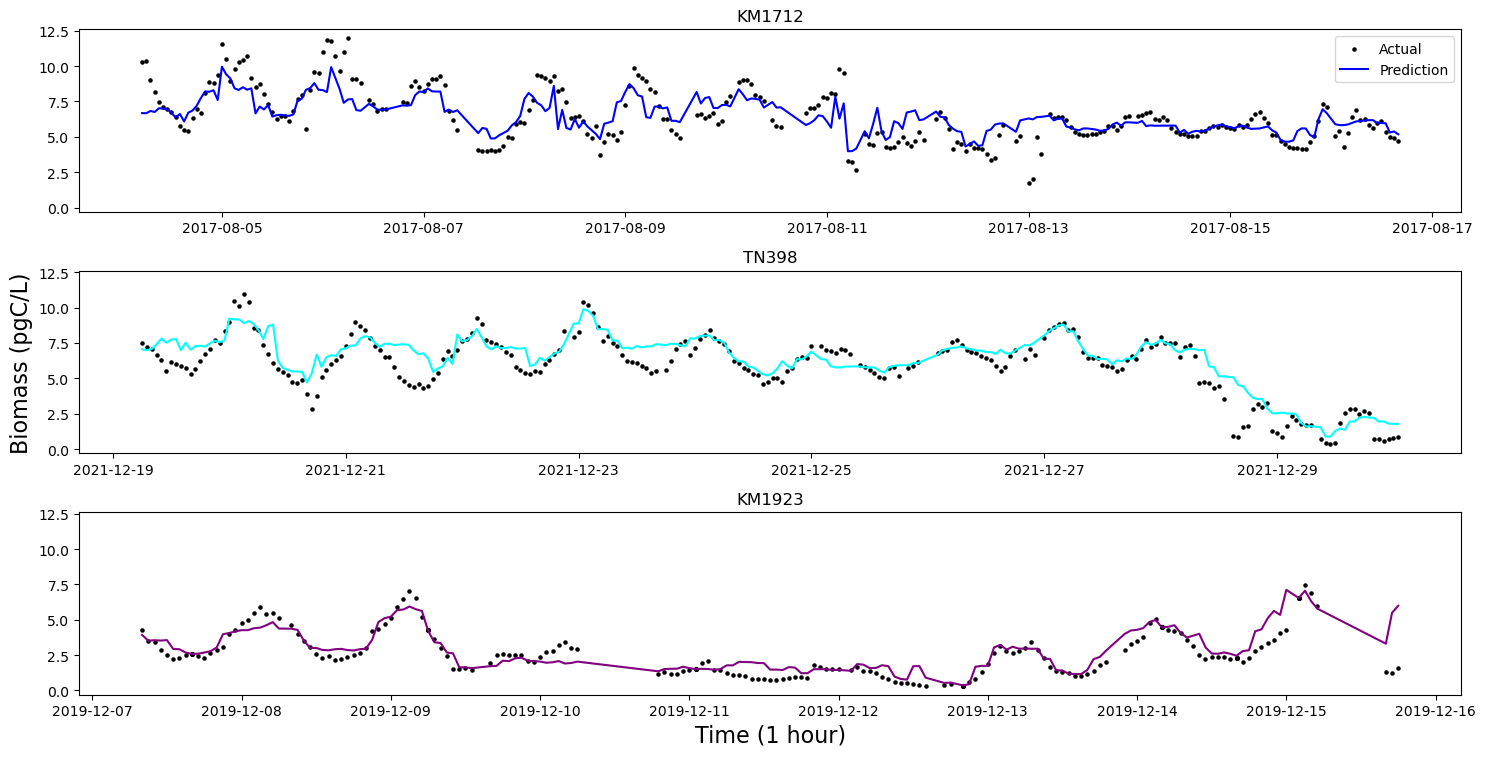

In [39]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create two subplots and unpack the output array immediately
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(15,8))

km1712 = pro_df[pro_df['cruisename'] == 'KM1712']
tn398 = pro_df[pro_df['cruisename'] == 'TN398']
km1923 = pro_df[pro_df['cruisename'] == 'KM1923']

      
ax1.scatter(km1712['time'], km1712['actual'], s=5, color='black', label='Actual')
ax1.plot(km1712['time'], km1712['prediction'], color='blue', label='Prediction')

ax1.set_title('KM1712')
ax1.legend()

ax2.scatter(tn398['time'], tn398['actual'], s=5, color='black', label='Actual' )
ax2.plot(tn398['time'], tn398['prediction'], color='cyan', label='Prediction')
ax2.set_title('TN398')
ax2.set_ylabel('Biomass (pgC/L)', fontsize=16)

ax3.scatter(km1923['time'], km1923['actual'], s=5, color='black', label='Actual')
ax3.plot(km1923['time'], km1923['prediction'], color='purple', label='Prediction')
ax3.set_xlabel('Time (1 hour)', fontsize=16)
ax3.set_title('KM1923')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add space for suptitle
plt.show()

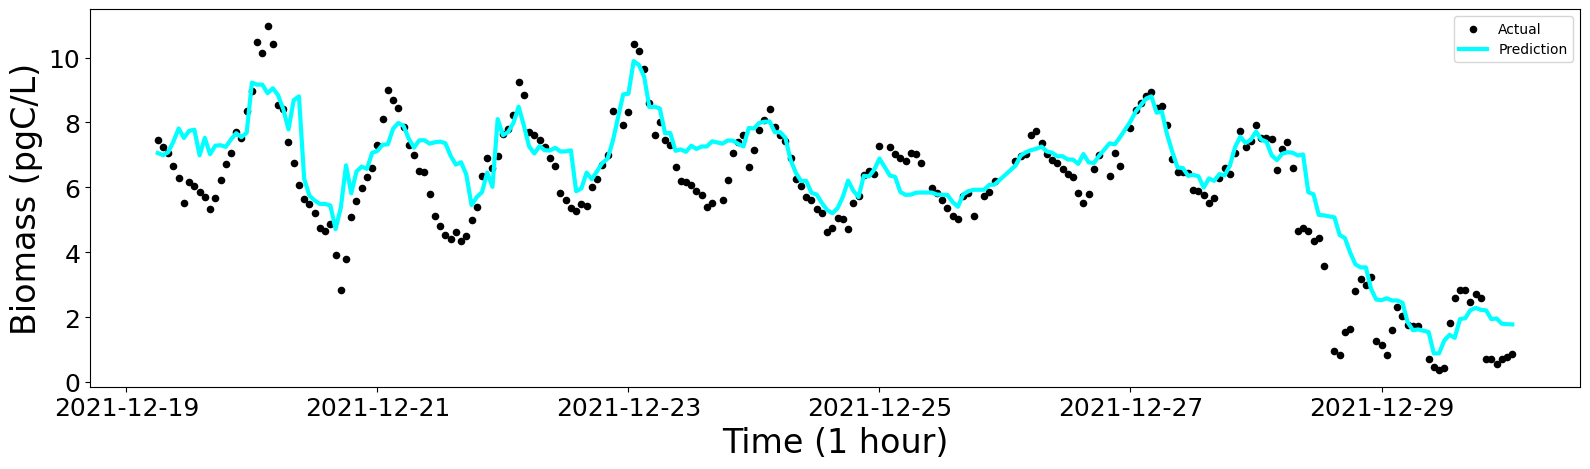

In [40]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))


tn398 = pro_df[pro_df['cruisename'] == 'TN398']



ax.scatter(tn398['time'], tn398['actual'], s=20, color='black', label='Actual' )
ax.plot(tn398['time'], tn398['prediction'], color='cyan', linewidth=3, label='Prediction')
ax.set_ylabel('Biomass (pgC/L)', fontsize=24)
ax.set_xlabel('Time (1 hour)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add space for suptitle
plt.show()

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def create_actual_prediction_plots_cruise_color_presentation(pop_df, selected_cruises, title_prefix='Prochlorococcus'):
    # Create a subplot grid
    num_cruises = len(selected_cruises)
    rows = 2 if num_cruises == 2 else int(num_cruises / 2) + 1
    cols = 2 if num_cruises > 2 else 1

    # Create the Matplotlib figure and gridspec
    fig = plt.figure(figsize=(12, 6*rows))
    gs = gridspec.GridSpec(rows, cols, figure=fig)

    # Define colors for 'actual' and 'prediction' lines
    colors = ['blue', 'purple', 'green', 'brown']

    # Iterate over each selected cruise and plot the 'actual' and 'prediction' data
    for i, cruise in enumerate(selected_cruises):
        # Filter dataframe for the current cruise
        cruise_df = pop_df[pop_df['cruisename'] == cruise]

        # Determine the subplot index
        row = int(i / cols)
        col = i % cols

        # Create the subplot
        ax = fig.add_subplot(gs[row, col])

        # Plot 'actual' and 'prediction' data
        ax.plot(cruise_df['time'], cruise_df['actual'], 'ko', label='Actual')
        ax.plot(cruise_df['time'], cruise_df['prediction'], color=colors[i], label='Prediction')
        ax.set_xlabel('Time (1 hour)')
        ax.set_ylabel('Biomass (pgC/L)')
        ax.set_title(cruise)
        ax.legend()

    # Adjust layout and display the figure
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add space for suptitle
    plt.show()

    # Optionally, save the figure to a file
    fig.savefig(f"figures/{title_prefix}/Actual_vs_Prediction-{title_prefix}.png")


In [42]:
# selected_cruises = ['TN398', 'KM1923']
# create_actual_prediction_plots_cruise_color(pop_df=pro_df,
#                                             title_prefix='Prochlorococcus',
#                                             selected_cruises=selected_cruises)

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_actual_prediction_plots_sample_1day(pop_df, title_prefix='Prochlorococcus'):
    unique_cruises = pop_df['cruisename'].unique()

    # Create a subplot grid
    num_cruises = len(unique_cruises)
    rows = int(num_cruises / 2) if num_cruises % 2 == 0 else int(num_cruises / 2) + 1
    fig = make_subplots(rows=rows, cols=2, subplot_titles=unique_cruises)

    # Define colors for 'actual' and 'prediction' traces
    actual_color = 'blue'
    prediction_color = 'red'

    # Iterate over each unique cruise and add a subplot
    for i, cruise in enumerate(unique_cruises):
        # Filter dataframe for the current cruise
        cruise_df = pop_df[pop_df['cruisename'] == cruise]
        cruise_df = cruise_df.resample('1440min', on='time').mean(numeric_only=True).reset_index()


        # Add the scatter plots for 'actual' and 'prediction' to the subplot
        row = int(i / 2) + 1
        col = i % 2 + 1
        fig.add_trace(go.Scatter(x=cruise_df['time'], y=cruise_df['actual'], mode='markers', name='Actual',
                                 marker=dict(color=actual_color)),
                      row=row, col=col)
        fig.add_trace(go.Scatter(x=cruise_df['time'], y=cruise_df['prediction'], mode='lines', name='Prediction',
                                 line=dict(color=prediction_color)),
                      row=row, col=col)
        fig.update_xaxes(title_text='Time', row=row, col=col)
        fig.update_yaxes(title_text='Value', row=row, col=col)

    # Update the layout and display the figure
    fig.update_layout(height=600 * rows, width=800, title_text='Daily Averaged Actual and Prediction for Each Cruise')
    fig.show()
    
    fig.write_html(f"figures/{title_prefix}/Actual_vs_Prediction_1Day-{title_prefix}.html")


In [44]:
create_actual_prediction_plots_sample_1day(pop_df=pro_df, title_prefix='Prochlorococcus')
create_actual_prediction_plots_sample_1day(pop_df=syn_df, title_prefix='Synechococcus')
create_actual_prediction_plots_sample_1day(pop_df=nano_df, title_prefix='Nanoeukaryotes')
create_actual_prediction_plots_sample_1day(pop_df=pico_df, title_prefix='Picoeukaryotes')

In [45]:
import plotly.graph_objects as go

def create_globe_scatter_plot(pop_df, title_prefix="Prochlorococcus", start_lat=0, start_lon=0):
    # Create a 3D scatter plot on a globe
    fig = go.Figure(data=go.Scattergeo(
        lat=pop_df['lat'],
        lon=pop_df['lon'],
        mode='markers',
        marker=dict(
            size=4,
            color=pop_df['residuals'],
            colorscale='Spectral',
            cmin=-50,
            cmax=50,
            colorbar=dict(title='Residuals (%)')
        )
    ))

    # Set the projection type to 'orthographic' for a globe, fitbounds centers the plot on data
    fig.update_geos(projection_type='orthographic', fitbounds="locations")
    # Set the title
    title = f"{title_prefix} Biomass Residuals"
    fig.update_layout(title=title)

    # Show the figure
    fig.show()
    f"{title_prefix} Biomass Residuals"
    fig.write_html(f"figures/{title_prefix}/globe_heatmap-residuals_{title_prefix}.html")


In [46]:
create_globe_scatter_plot(pop_df=pro_df, title_prefix='Prochlorococcus')
create_globe_scatter_plot(pop_df=syn_df, title_prefix='Synechococcus')
create_globe_scatter_plot(pop_df=pico_df, title_prefix='Picoeukaryotes')
create_globe_scatter_plot(pop_df=nano_df, title_prefix='Nanoeukaryotes')

In [47]:
import numpy as np
import plotly.graph_objects as go

def create_globe_scatter_plot_1deg_binned(pop_df, title_prefix="Prochlorococcus", start_lat=0, start_lon=0):
    # Round latitude and longitude values to the nearest degree
    lat_bins = np.round(pop_df['lat'])
    lon_bins = np.round(pop_df['lon'])

    # Create a new DataFrame with the binned latitude and longitude values
    binned_df = pop_df.copy()
    binned_df['lat_bins'] = lat_bins
    binned_df['lon_bins'] = lon_bins

    # Group the data by latitude and longitude bins and calculate the average residuals
    grouped_df = binned_df.groupby(['lat_bins', 'lon_bins']).mean().reset_index()

    # Create a 3D scatter plot on a globe
    fig = go.Figure(data=go.Scattergeo(
        lat=grouped_df['lat_bins'],
        lon=grouped_df['lon_bins'],
        mode='markers',
        marker=dict(
            size=4,
            color=grouped_df['residuals'],
            colorscale='Spectral',
            cmin=-50,
            cmax=50,
            colorbar=dict(title='Residuals (%)')
        )
    ))

    # Set the projection type to 'orthographic' for a globe, fitbounds centers the plot on data
    fig.update_geos(projection_type='orthographic', fitbounds="locations")
    # Set the title
    title = f"{title_prefix} Biomass Residuals"
    fig.update_layout(title=title)

    # Show the figure
    fig.show()
    fig.write_html(f"figures/{title_prefix}/globe_heatmap-residuals_1deg_binned_{title_prefix}.html")


In [48]:
create_globe_scatter_plot_1deg_binned(pop_df=pro_df, title_prefix='Prochlorococcus')
create_globe_scatter_plot_1deg_binned(pop_df=syn_df, title_prefix='Synechococcus')
create_globe_scatter_plot_1deg_binned(pop_df=pico_df, title_prefix='Picoeukaryotes')
create_globe_scatter_plot_1deg_binned(pop_df=nano_df, title_prefix='Nanoeukaryotes')

/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_52318/1009455223.py:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_52318/1009455223.py:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_52318/1009455223.py:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_52318/1009455223.py:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [50]:
feature_importance_pro

NameError: name 'feature_importance_pro' is not defined

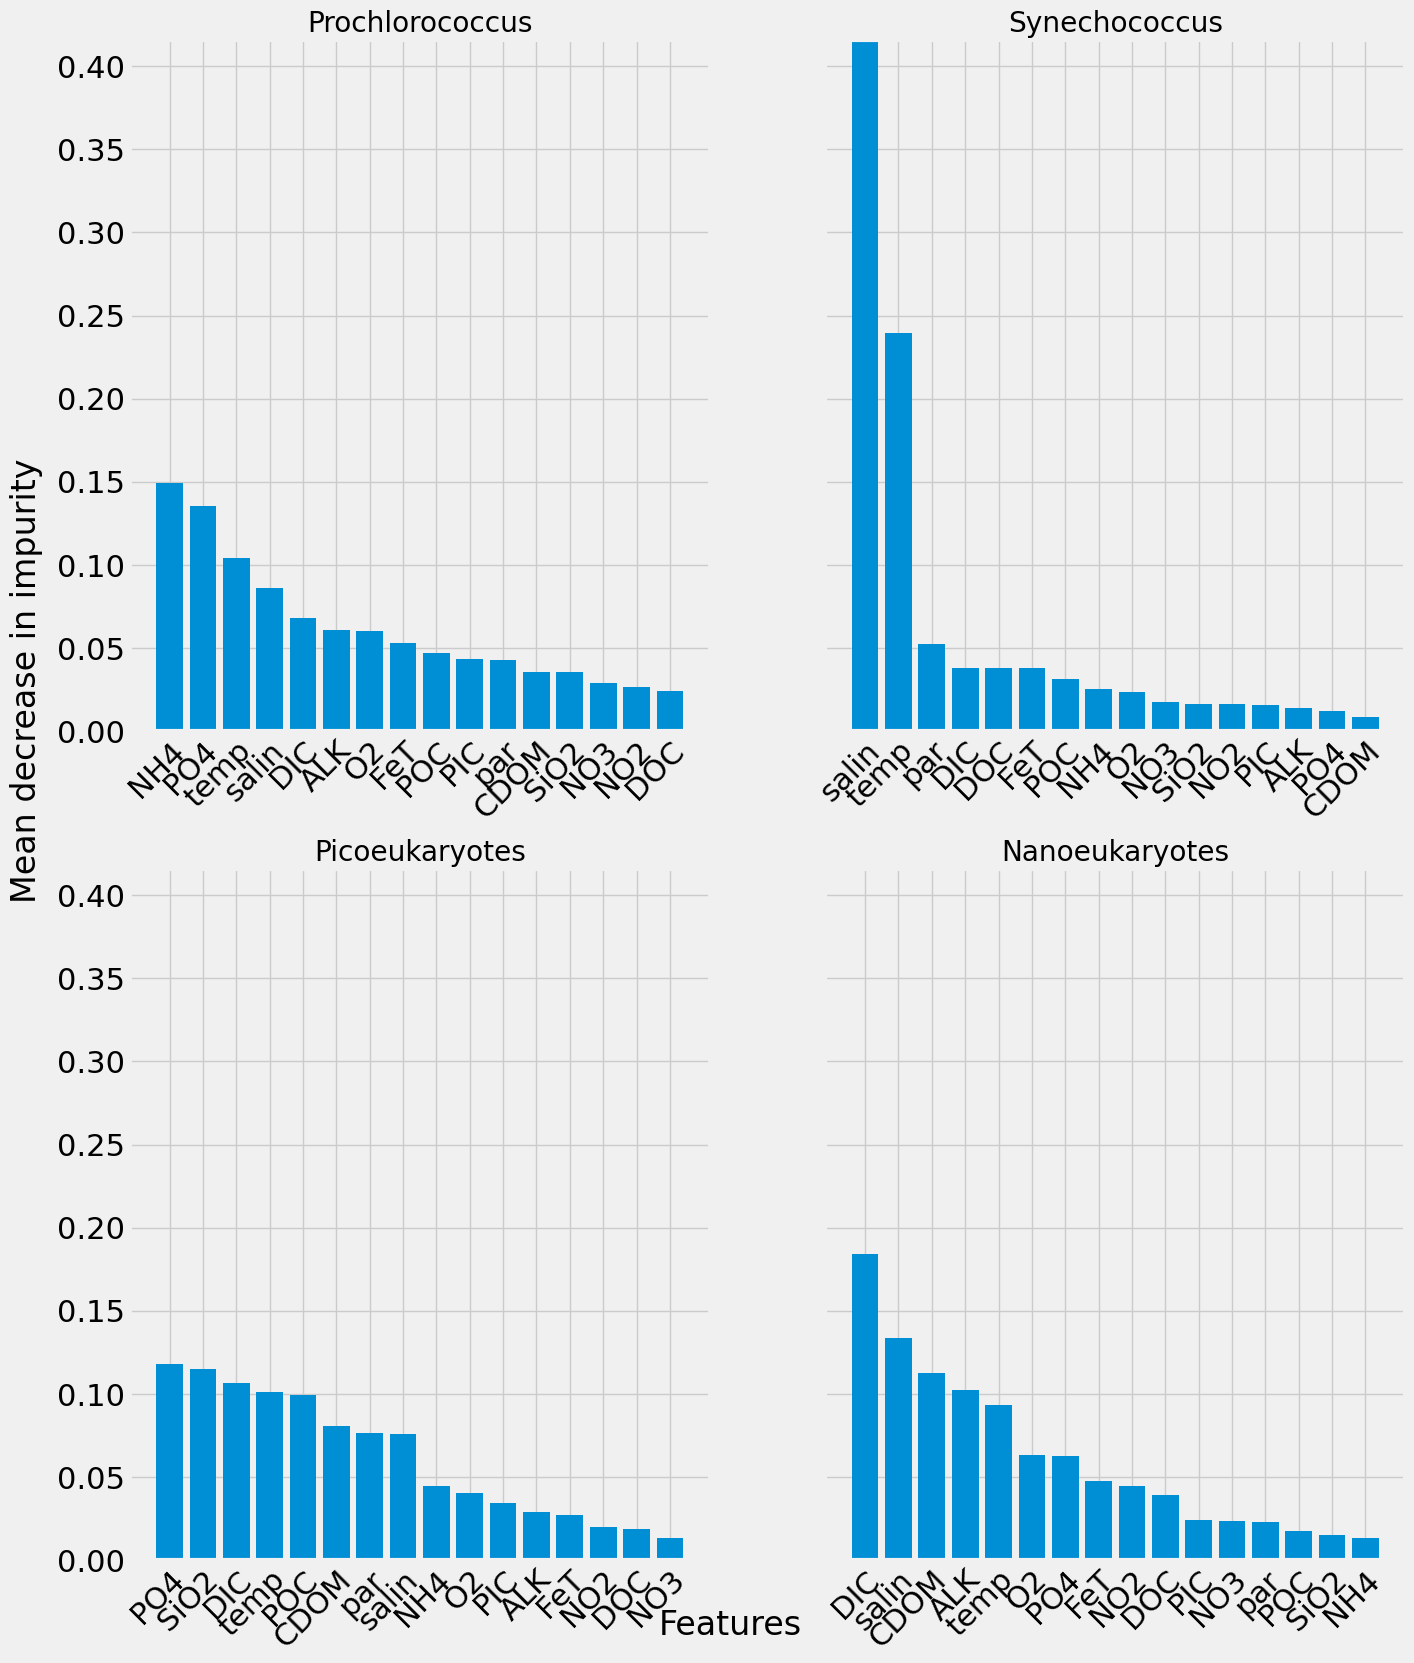

In [86]:
import matplotlib.pyplot as plt

# Function to filter top 95% variable importance
def filter_top_95_variable_importance(df):
    # Your implementation to filter top 95% variable importance
    # Return the filtered dataframe
    return df

# Create four polar axes and access them through the returned array -- Shared Y Axis!
fig, axs = plt.subplots(2, 2, sharey='row', figsize=(15, 8))

populations = ['Prochlorococcus', 'Synechococcus', 'Picoeukaryotes', 'Nanoeukaryotes']
feature_importance_list = [feature_importance_pro, feature_importance_syn, feature_importance_pico, feature_importance_nano]

# Iterate through each population and plot feature importance
# Iterate through each population and plot feature importance
for i, population in enumerate(populations):
    # Plotting feature importance
    axs[i // 2, i % 2].bar(x=feature_importance_list[i].index, height=feature_importance_list[i][0], orientation='vertical')
    # Aligning x ticks
    axs[i // 2, i % 2].set_xticks(feature_importance_list[i].index)
    axs[i // 2, i % 2].set_xticklabels(feature_importance_list[i].index, rotation=45, ha='right', rotation_mode='anchor', fontsize=10)  # Adjust the fontsize
    axs[i // 2, i % 2].set_title(population)
    
    # Adjust font size of x and y axis labels
    axs[i // 2, i % 2].tick_params(axis='both', which='major', labelsize=22)  # Adjust the fontsize

    # Optionally, you can set other plot properties here

    # Find the maximum feature importance value for all populations
    max_importance_value = max([feature_importance_list[j][0].max() for j in range(len(populations))])

    # Set the y-axis limits for each subplot to be the same (using the maximum value)
    axs[i // 2, i % 2].set_ylim(0, max_importance_value)

plt.subplots_adjust(left=0.1, right=0.95, top=2, bottom=0.1)  # Adjust the padding as needed
plt.style.use('fivethirtyeight')
# Set common x and y labels for the entire set of subplots
fig.text(0.5, 0.007, 'Features', ha='center', fontsize=24)
fig.text(0.02, 1.2, 'Mean decrease in impurity', va='center', rotation='vertical', fontsize=24)



plt.show()


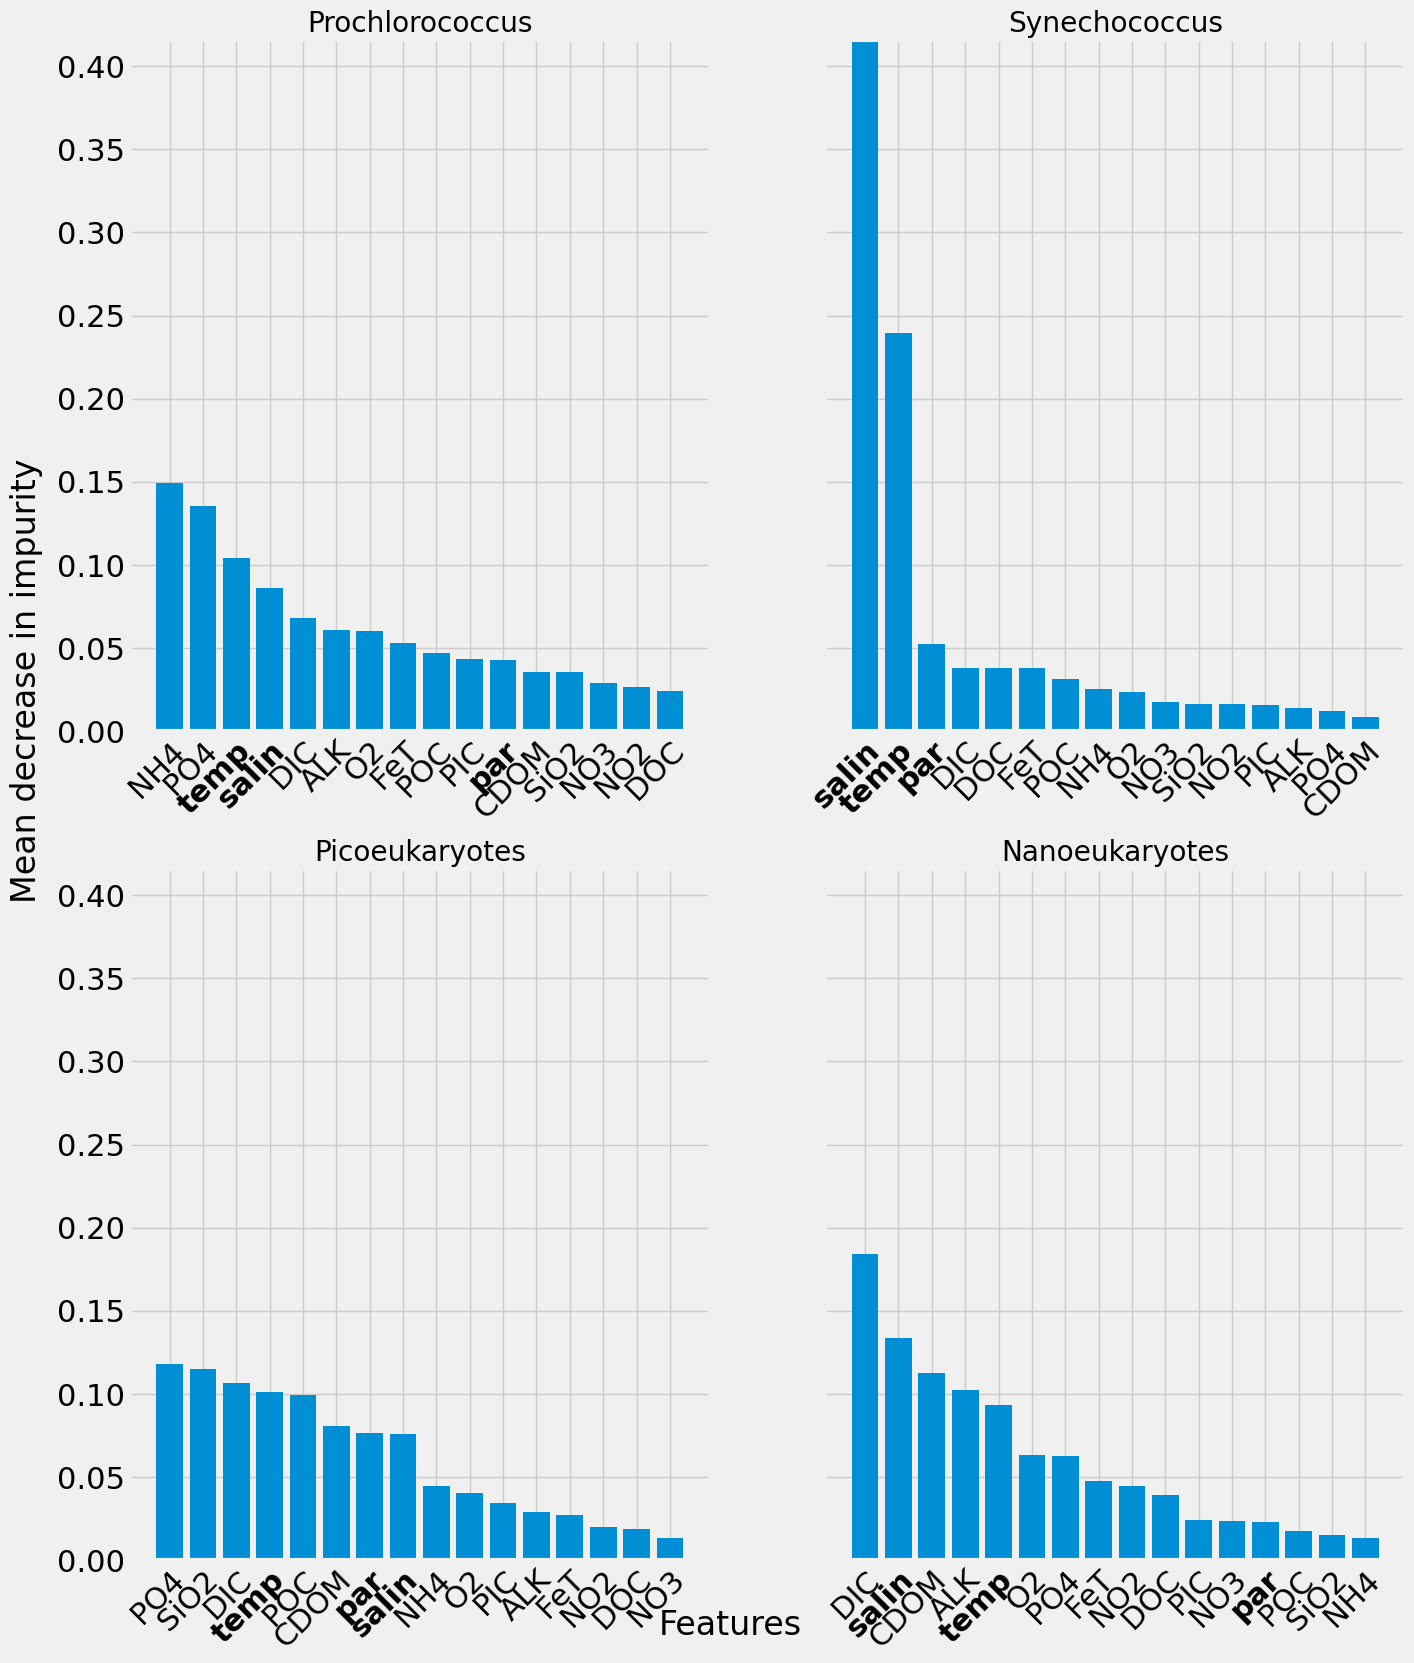

In [90]:
import matplotlib.pyplot as plt

# Function to filter top 95% variable importance
def filter_top_95_variable_importance(df):
    # Your implementation to filter top 95% variable importance
    # Return the filtered dataframe
    return df

# Create four polar axes and access them through the returned array -- Shared Y Axis!
fig, axs = plt.subplots(2, 2, sharey='row', figsize=(15, 8))

populations = ['Prochlorococcus', 'Synechococcus', 'Picoeukaryotes', 'Nanoeukaryotes']
feature_importance_list = [feature_importance_pro, feature_importance_syn, feature_importance_pico, feature_importance_nano]

# Iterate through each population and plot feature importance
for i, population in enumerate(populations):
    # Plotting feature importance
    ax = axs[i // 2, i % 2]
    ax.bar(x=feature_importance_list[i].index, height=feature_importance_list[i][0], orientation='vertical')
    # Aligning x ticks
    x_labels = feature_importance_list[i].index
    
    # Make specific x-axis labels bold
    bold_x_labels = ['temp', 'salin', 'par']
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha='right', rotation_mode='anchor', fontsize=10)  # Adjust the fontsize
    
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in bold_x_labels:
            tick_label.set_weight('bold')

    ax.set_title(population)
    
    # Adjust font size of x and y axis labels
    ax.tick_params(axis='both', which='major', labelsize=22)  # Adjust the fontsize

    # Find the maximum feature importance value for all populations
    max_importance_value = max([feature_importance_list[j][0].max() for j in range(len(populations))])

    # Set the y-axis limits for each subplot to be the same (using the maximum value)
    ax.set_ylim(0, max_importance_value)



plt.subplots_adjust(left=0.1, right=0.95, top=2, bottom=0.1)  # Adjust the padding as needed
plt.style.use('fivethirtyeight')
# Set common x and y labels for the entire set of subplots
fig.text(0.5, 0.007, 'Features', ha='center', fontsize=24)
fig.text(0.02, 1.2, 'Mean decrease in impurity', va='center', rotation='vertical', fontsize=24)



plt.show()


In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=1, sharey='row', figsize=(15,8))
axs[0]

In [61]:
rf_syn.feature_importances_

array([0.41561918, 0.23924358, 0.01642803, 0.03111959, 0.01190831,
       0.01571993, 0.02377486, 0.01723184, 0.01610283, 0.02507043,
       0.03767733, 0.03772772, 0.03822735, 0.00820952, 0.01365691,
       0.05228262])

ConversionError: Failed to convert value(s) to axis units: Index(['PO4', 'SiO2', 'DIC', 'temp', 'POC', 'CDOM', 'par', 'salin', 'NH4',
       'O2', 'PIC', 'ALK', 'FeT', 'NO2', 'DOC', 'NO3'],
      dtype='object')

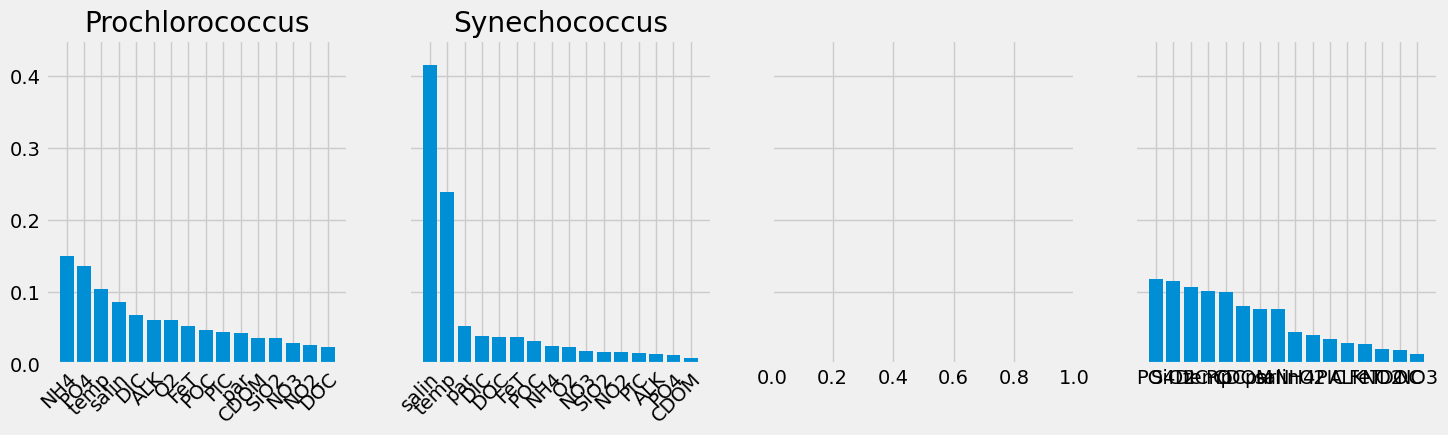

In [59]:
### Plotting variable importances (that add up to 90%) for all four populations ######

# Create four polar axes and access them through the returned array -- Shared Y Axis!
fig, axs = plt.subplots(ncols=4, nrows=1, sharey='row', figsize=(16,4))

########################### Prochlorococcus #################################

# Gathering Feature importance
feature_importance_pro = pd.DataFrame(rf_pro.feature_importances_, index=feature_list_pro).sort_values(by=0, ascending=False)
feature_importance_pro = filter_top_95_variable_importance(feature_importance_pro)

#plotting feature importance
axs[0].bar(x=feature_importance_pro.index,height=feature_importance_pro[0], orientation = 'vertical')
#aligning x ticks
axs[0].set_xticks(feature_importance_pro.index)
axs[0].set_xticklabels(feature_importance_pro.index, rotation=45, ha='right', rotation_mode='anchor')
axs[0].set_ylim(0, 0.45)
axs[0].set_title('Prochlorococcus')

########################### Synechococcus #################################

# Gathering Feature importance
feature_importance_syn = pd.DataFrame(rf_syn.feature_importances_, index=feature_list_syn).sort_values(by=0, ascending=False)
feature_importance_syn = filter_top_95_variable_importance(feature_importance_syn)

#plotting feature importance
axs[1].bar(x=feature_importance_syn.index,height=feature_importance_syn[0], orientation = 'vertical')
#aligning x ticks
axs[1].set_xticks(feature_importance_syn.index)
axs[1].set_xticklabels(feature_importance_syn.index, rotation=45, ha='right', rotation_mode='anchor')
axs[1].set_ylim(0, 0.45)
axs[1].set_title('Synechococcus')

########################### Picoeukaryotes #################################

# Gathering Feature importance
feature_importance_pico = pd.DataFrame(rf_pico.feature_importances_, index=feature_list_pico).sort_values(by=0, ascending=False)
feature_importance_pico = filter_top_95_variable_importance(feature_importance_pico)


#plotting feature importance
axs[3].bar(x=feature_importance_pico.index,height=feature_importance_pico[0], orientation = 'vertical')
#aligning x ticks
axs[2].set_xticks(feature_importance_pico.index)
axs[2].set_xticklabels(feature_importance_pico.index, rotation=45, ha='right', rotation_mode='anchor')
axs[2].set_ylim(0, 0.45)
axs[2].set_title('Picoeukaryotes')


########################### Nanoeukaryotes #################################

# Gathering Feature importance
feature_importance_nano = pd.DataFrame(rf_nano.feature_importances_, index=feature_list_nano).sort_values(by=0, ascending=False)
feature_importance_nano = filter_top_95_variable_importance(feature_importance_nano)

#plotting feature importance
axs[3].bar(x=feature_importance_nano.index,height=feature_importance_nano[0], orientation = 'vertical')
#aligning x ticks
axs[3].set_xticks(feature_importance_nano.index)
axs[3].set_xticklabels(feature_importance_nano.index, rotation=45, ha='right', rotation_mode='anchor')
axs[3].set_ylim(0, 0.45)
axs[3].set_title('Nanoeukaryotes')



plt.suptitle("Top 95% Feature Importance", fontsize=16, fontweight='bold', y=1.4)  # y position adjusts the vertical placement of the title
#plt.subplots_adjust(left=0.1, right=0.95, top=1.3, bottom=0.1)  # Adjust the padding as needed


plt.style.use('fivethirtyeight')
plt.show()



# # Import matplotlib for plotting and use magic command for Jupyter Notebooks
# import matplotlib.pyplot as plt
# %matplotlib inline
# # Set the style

# # Make a bar chart


# # Axis labels and title
# plt.ylabel('Importance'); plt.title('Variable Importances for Pro RF');

In [ ]:
feature_list_syn

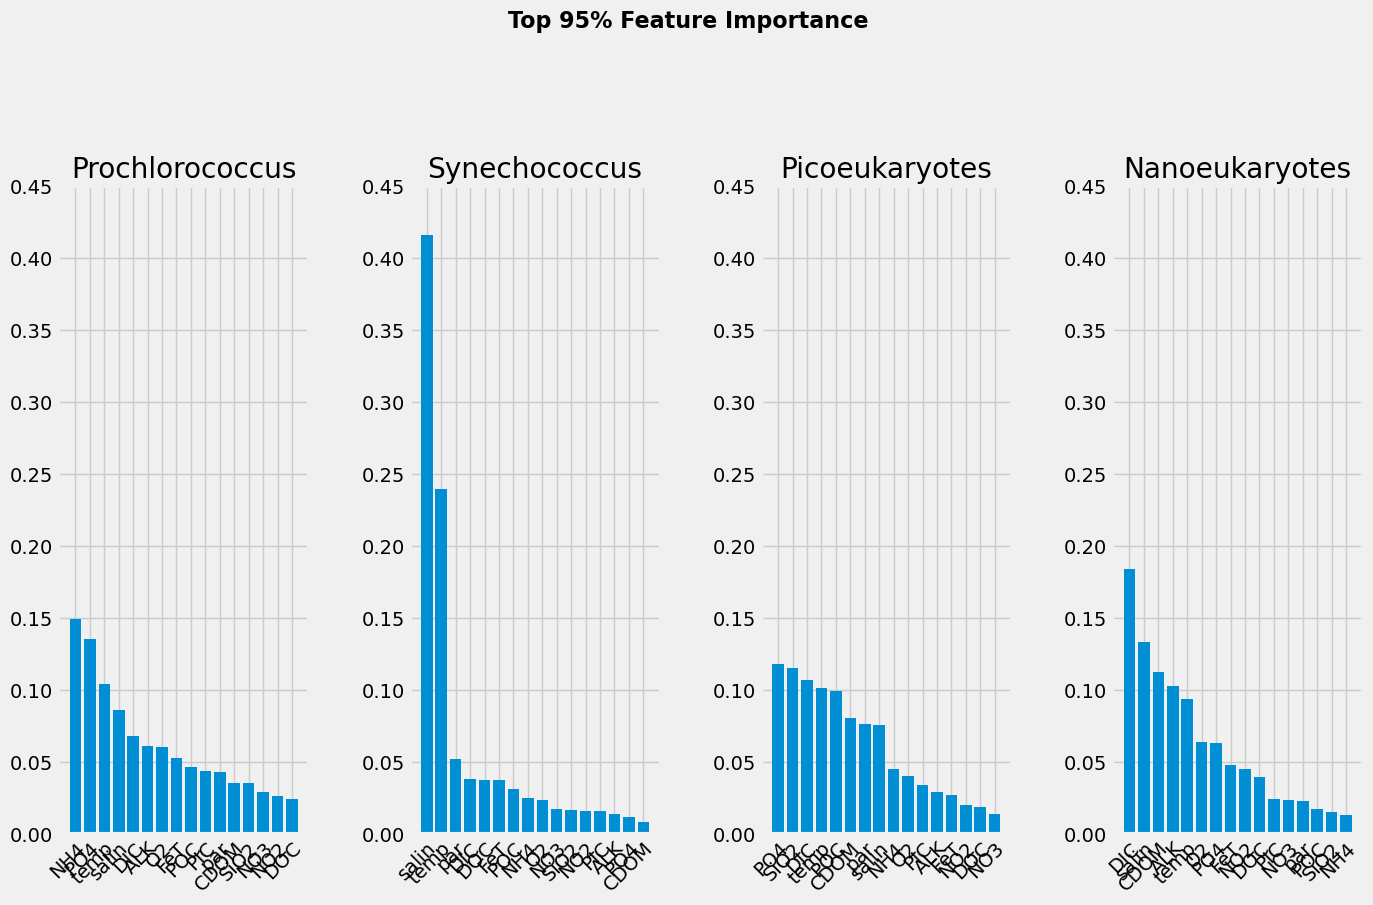

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Create four polar axes and access them through the returned array -- Shared Y Axis!
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(15, 8))

populations = ['Prochlorococcus', 'Synechococcus', 'Picoeukaryotes', 'Nanoeukaryotes']
feature_importance_data = [feature_importance_pro, feature_importance_syn, feature_importance_pico, feature_importance_nano]
feature_lists = [feature_list_pro, feature_list_syn, feature_list_pico, feature_list_nano]

for i, (pop, feature_importance, feature_list) in enumerate(zip(populations, feature_importance_data, feature_lists)):
    # Gathering Feature importance
    feature_importance = pd.DataFrame(feature_importance[0], index=feature_list).sort_values(by=0, ascending=False)
    feature_importance = filter_top_95_variable_importance(feature_importance)
    
    # Plotting feature importance
    axs[i].bar(x=feature_importance.index, height=feature_importance[0], orientation='vertical')
    
    # Aligning x ticks
    axs[i].set_xticks(feature_importance.index)
    axs[i].set_xticklabels(feature_importance.index, rotation=45, ha='right', rotation_mode='anchor')
    axs[i].set_ylim(0, 0.45)
    axs[i].set_title(pop)

plt.suptitle("Top 95% Feature Importance", fontsize=16, fontweight='bold', y=1.1)
plt.subplots_adjust(wspace=0.4)

plt.style.use('fivethirtyeight')
plt.show()


In [ ]:
!pip install dtreeviz

In [ ]:
from sklearn.model_selection import train_test_split
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets"
train_features, test_features, train_labels, test_labels =train_test_split(
    features_pro, labels_pro, test_size = 0.7, random_state = 42
)

In [ ]:
!pip install graphviz pydotplus

In [ ]:
# from sklearn.tree import export_graphviz
# import pydotplus
# from IPython.display import Image

# tree_to_visualize = rf_pro.estimators_[0]

# # Export the decision tree to a DOT file
# export_graphviz(tree_to_visualize, out_file='tree.dot', feature_names=feature_list_pro, filled=True)

# # Convert the DOT file to a PNG image using pydotplus
# graph = pydotplus.graph_from_dot_file('tree.dot')
# graph.write_png('tree.png')

# # Display the tree image
# Image(filename='tree.png')